In [40]:
import polars as pl

dataset = pl.read_csv("../test_data/resin.csv")
index = dataset.get_column("")
dataset.drop_in_place(index.name)

print(dataset)

shape: (20, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64            ┆ f64            ┆ i64         ┆ i64  │
╞══════════╪════════════════╪════════════════╪════════════════╪═════════════╪══════╡
│ 0.125    ┆ 0.5            ┆ 0.1            ┆ 0.4            ┆ 85          ┆ 80   │
│ 0.122    ┆ 0.7            ┆ 0.0            ┆ 0.3            ┆ 55          ┆ 50   │
│ 0.624    ┆ 0.0            ┆ 0.2            ┆ 0.8            ┆ 70          ┆ 40   │
│ 0.042    ┆ 0.9            ┆ 0.1            ┆ 0.0            ┆ 60          ┆ 90   │
│ 0.589    ┆ 0.2            ┆ 0.0            ┆ 0.8            ┆ 75          ┆ 120  │
│ …        ┆ …              ┆ …              ┆ …              ┆ …           ┆ …    │
│ 0.087    ┆ 0.5            ┆ 0.3            ┆ 0.2

Text(0, 0.5, 'frequency')

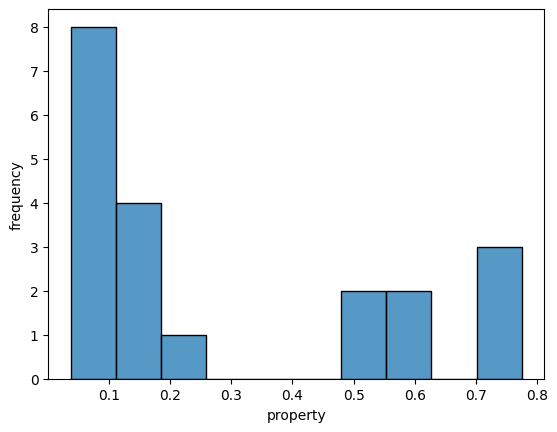

In [41]:
# 3.2 ヒストグラム
import polars as pl
import seaborn as sns

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

x_name = "property"  # ヒストグラムを作成する変数名
y_name = "frequency"  # 縦軸の変数名
number_of_bins = 10
# ヒストグラムの作成
axes = sns.histplot(data=dataset, x=x_name, bins=number_of_bins)
axes.set_xlabel(x_name)  # 横軸の名前
axes.set_ylabel(y_name)  # 縦軸の名前

Text(0, 0.5, 'raw material 1')

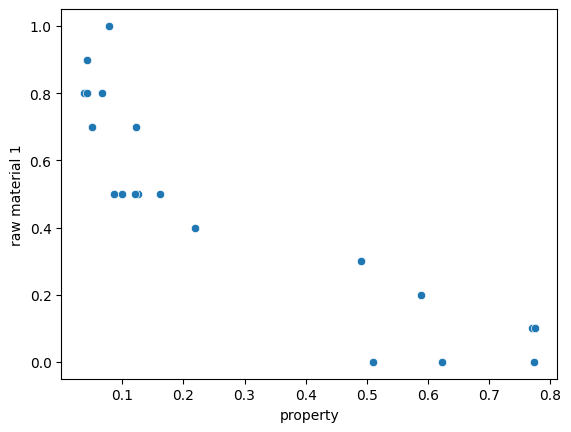

In [42]:
# 3.2 散布図

import polars as pl
import seaborn as sns

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

x_name = "property"  # 縦軸の変数名
y_name = "raw material 1"  # 横軸の変数名

axes = sns.scatterplot(dataset, x=x_name, y=y_name)  # 散布図の作成
axes.set_xlabel(x_name)
axes.set_ylabel(y_name)

In [43]:
# 3.3 統計量の確認

import polars as pl

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

stat_data = dataset.describe()
stat_data.write_csv("../output/resin_statistics.csv")
stat_data

statistic,property,raw material 1,raw material 2,raw material 3,temperature,time
str,f64,f64,f64,f64,f64,f64
"""count""",20.0,20.0,20.0,20.0,20.0,20.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.28925,0.465,0.12,0.415,72.25,55.5
"""std""",0.282036,0.319992,0.115166,0.328113,16.260624,35.015034
"""min""",0.037,0.0,0.0,0.0,50.0,10.0
"""25%""",0.079,0.2,0.0,0.1,60.0,40.0
"""50%""",0.125,0.5,0.1,0.3,70.0,50.0
"""75%""",0.511,0.7,0.2,0.7,85.0,80.0
"""max""",0.775,1.0,0.4,0.9,100.0,120.0


In [44]:
import polars as pl

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

cov_data = dataset.select(
    [
        pl.concat([pl.cov(col1, col2) for col2 in dataset.columns])
        for col1 in dataset.columns
    ]
).insert_column(0, pl.Series("", dataset.columns))
cov_data.write_csv("../output/resin_covariance.csv")
print(cov_data)

corr_data = dataset.corr().insert_column(0, pl.Series("", dataset.columns))
corr_data.write_csv("../output/resin_correlation_coefficient.csv")
print(corr_data)

shape: (6, 7)
┌──────────────┬───────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┐
│              ┆ property  ┆ raw material ┆ raw material ┆ raw         ┆ temperature ┆ time        │
│ ---          ┆ ---       ┆ 1            ┆ 2            ┆ material 3  ┆ ---         ┆ ---         │
│ str          ┆ f64       ┆ ---          ┆ ---          ┆ ---         ┆ f64         ┆ f64         │
│              ┆           ┆ f64          ┆ f64          ┆ f64         ┆             ┆             │
╞══════════════╪═══════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╡
│ property     ┆ 0.079544  ┆ -0.080622    ┆ -0.007684    ┆ 0.088307    ┆ 0.242303    ┆ -2.279868   │
│ raw material ┆ -0.080622 ┆ 0.102395     ┆ -0.004       ┆ -0.098395   ┆ -0.496053   ┆ 2.518421    │
│ 1            ┆           ┆              ┆              ┆             ┆             ┆             │
│ raw material ┆ -0.007684 ┆ -0.004       ┆ 0.013263     ┆ -0.009263   ┆ 0.05

In [45]:
# 3.4 特徴量の標準化

import polars as pl

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

zero_stdev_cols = [
    col for col, std in dataset.std().row(0, named=True).items() if std in [0, None]
]
dataset_wo_zero_std = dataset.drop(zero_stdev_cols)

# 特徴量の標準化
autoscaled_dataset = dataset_wo_zero_std.select(
    (pl.all() - pl.all().mean()) / pl.all().std()
)

print("標準化後の平均値")
print(autoscaled_dataset.mean())
print("\n標準化後の標準偏差")
print(autoscaled_dataset.std())

autoscaled_dataset.clone().insert_column(0, index).write_csv(
    "../output/autoscaled_dataset.csv"
)


標準化後の平均値
shape: (1, 6)
┌────────────┬────────────────┬────────────────┬────────────────┬─────────────┬─────────────┐
│ property   ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time        │
│ ---        ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---         │
│ f64        ┆ f64            ┆ f64            ┆ f64            ┆ f64         ┆ f64         │
╞════════════╪════════════════╪════════════════╪════════════════╪═════════════╪═════════════╡
│ 1.7764e-16 ┆ -6.6613e-17    ┆ 7.7716e-17     ┆ 2.0539e-16     ┆ 2.2204e-17  ┆ -1.1102e-17 │
└────────────┴────────────────┴────────────────┴────────────────┴─────────────┴─────────────┘

標準化後の標準偏差
shape: (1, 6)
┌──────────┬────────────────┬────────────────┬────────────────┬─────────────┬──────┐
│ property ┆ raw material 1 ┆ raw material 2 ┆ raw material 3 ┆ temperature ┆ time │
│ ---      ┆ ---            ┆ ---            ┆ ---            ┆ ---         ┆ ---  │
│ f64      ┆ f64            ┆ f64      

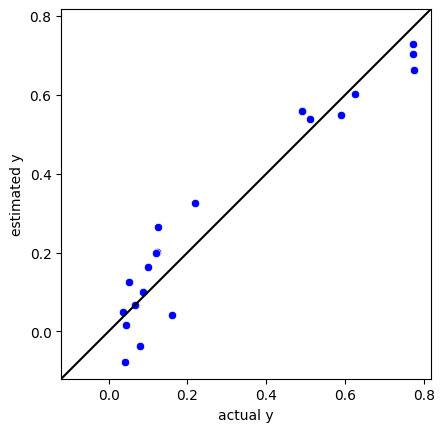

In [46]:
# 3.5 最小二乗法による回帰分析

import polars as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

# モデル構築 1. データセットの分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# モデル構築 2. 特徴量の標準化 (標準偏差が 0 の特徴量の削除)
zero_stdev_cols = [
    col for col, std in x.std().row(0, named=True).items() if std in [0, None]
]
x_wo_zero_std = x.drop(zero_stdev_cols)
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = x_wo_zero_std.select((pl.all() - pl.all().mean()) / pl.all().std())

# モデル構築 3. OLS による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

# 標準回帰係数を保存
pl.DataFrame(
    {"": x.columns, "standard_regression_coefficients": model.coef_}
).write_csv("../output/standard_regression_coefficients_ols.csv")

# 今回はモデル構築に用いたデータセットと同じデータセットにおける Y の値を推定します
# 新しいデータの推定 1. モデル構築用のデータセットを用いた特徴量の標準化
autoscaled_x_new = (
    x - x_wo_zero_std.mean().select(pl.all().repeat_by(x.height).explode())
) / x_wo_zero_std.std().select(pl.all().repeat_by(x.height).explode())

# 新しいデータの推定 2. Y の値の推定
autoscaled_estimated_y_new = model.predict(autoscaled_x_new)

# 新しいデータの推定 3. 推定値のスケールをもとに戻す
estimated_y_new = pl.Series(
    "estimated_y", autoscaled_estimated_y_new * y.std() + y.mean()
)
pl.DataFrame({"": index, "estimated_y": estimated_y_new}).write_csv(
    "../output/estimated_y_ols.csv"
)

# 実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y, y=estimated_y_new, color="blue")
y_max = pl.concat([y, estimated_y_new]).max()  # 実測値と推定値両方の最大値
y_min = pl.concat([y, estimated_y_new]).min()  # 実測値と推定値両方の最小値
# 取得した最小値-5%から最大値+5%まで、対角線を作成
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)

ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に


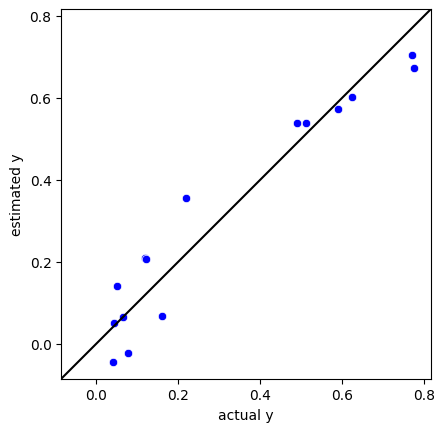

r^2 for training data : 0.920574061363659
RMSE for training data : 0.07642250753813626
MAE for training data : 0.06501558909890058


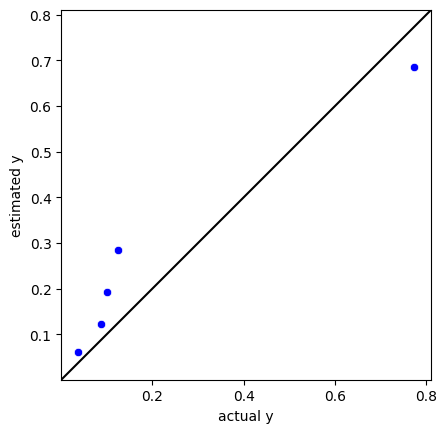

r^2 for test data : 0.8858269877135411
RMSE for test data : 0.09318984065049911
MAE for test data : 0.07967076922528649


In [47]:
# 3.6 外部バリデーション
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.metrics import (  # r^2, RMSE, MAE の計算に使用
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import (
    train_test_split,  # トレーニングデータとテストデータに分割するときに使用
)

num_of_test_samples = 5  # テストデータのサンプル数
dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
# random_state に数字を与えることで、別のときに同じ数字を使えば、ランダムとはいえ同じ結果にすることができます
if num_of_test_samples:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=num_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

else:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()


# 標準偏差が 0 の特徴量の削除
zero_stdev_cols = [
    col for col, std in x.std().row(0, named=True).items() if std in [0, None]
]
x_train = x_train.drop(zero_stdev_cols)
x_test = x_test.drop(zero_stdev_cols)

# オートスケーリング
autoscaled_y_train = (y_train - y_train.mean()) / y_train.std()
autoscaled_x_train = x_train.select((pl.all() - pl.all().mean()) / pl.all().std())

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# 標準回帰係数
std_regr_coef = pl.Series("standard_regression_coefficients", model.coef_)
std_regr_coef.to_frame().insert_column(0, pl.Series(x.columns)).write_csv(
    "../output/standard_regression_coefficients_ols.csv"
)

# トレーニングデータの推定
autoscaled_estimated_y_train = model.predict(autoscaled_x_train)  # y の推定
estimated_y_train = (  # スケールをもとに戻す
    autoscaled_estimated_y_train * y_train.std() + y_train.mean()
)
estimated_y_train = pl.Series("estimated_y", estimated_y_train)

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(  # 実測値 vs. 推定値プロット
    x=y_train, y=estimated_y_train, c="blue"
)
# 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_max = max(y_train.max(), estimated_y_train.max())
# 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
y_min = min(y_train.min(), estimated_y_train.min())
# 取得した最小値-5%から最大値+5%まで、対角線を作成
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print(
    "RMSE for training data :",
    root_mean_squared_error(y_train, estimated_y_train),
)
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
results_train = (
    y_train.to_frame()
    .select(pl.col(y_train.name).alias("actual_y"))
    .insert_column(1, estimated_y_train)
    .with_columns(
        (pl.col("actual_y") - pl.col("estimated_y")).alias(
            "error_of_y(actual_y-estimated_y)"
        )
    )
)
# 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください
results_train.write_csv("../output/estimated_y_train_in_detail_ols.csv")

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = (
    x_test - x_train.mean().select(pl.all().repeat_by(x_test.height).explode())
) / x_train.std().select(pl.all().repeat_by(x_test.height).explode())

# テストデータの推定
autoscaled_estimated_y_test = model.predict(autoscaled_x_test)  # y の推定
# スケールをもとに戻す
estimated_y_test = pl.Series(
    "estimated_y_test", autoscaled_estimated_y_test * y_train.std() + y_train.mean()
)

# テストデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_test, y=estimated_y_test, c="blue")
# 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_max = max(y_test.max(), estimated_y_test.max())
# 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
y_min = min(y_test.min(), estimated_y_test.min())
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(  # 取得した最小値-5%から最大値+5%まで、対角線を作成
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
# y 軸の範囲の設定
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
# x 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print(
    "RMSE for test data :",
    root_mean_squared_error(y_test, estimated_y_test),
)
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
results_test = (
    y_test.to_frame()
    .select(pl.col(y_test.name).alias("actual_y"))
    .insert_column(1, estimated_y_test)
    .with_columns(
        (pl.col("actual_y") - pl.col("estimated_y_test")).alias(
            "error_of_y(actual_y-estimated_y)"
        )
    )
)
# 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください
results_test.write_csv("../output/estimated_y_test_in_detail_ols.csv")


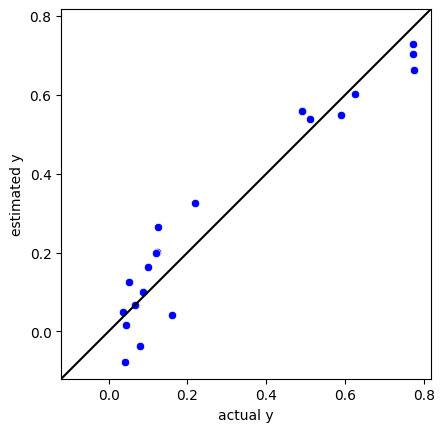

r^2 for training data : 0.9190600238137889
RMSE for training data : 0.0782074054211705
MAE for training data : 0.0664516783215491


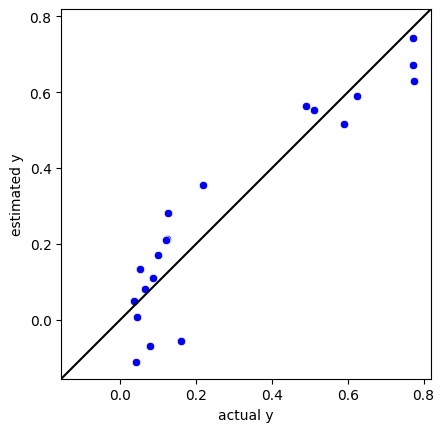

r^2 in cross-validation : 0.859772333640355
RMSE in cross-validation : 0.1029397704180464
MAE in cross-validation : 0.08647446595490224


In [48]:
# 3.6 クロスバリデーション
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用
from sklearn.metrics import (  # r^2, RMSE, MAE の計算に使用
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import (
    KFold,
    cross_val_predict,
)

fold_number = 10  # クロスバリデーションの fold 数
dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# 標準偏差が 0 の特徴量の削除
zero_stdev_cols = [
    col for col, std in x.std().row(0, named=True).items() if std in [0, None]
]
x = x.drop(zero_stdev_cols)

# オートスケーリング
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = x.select((pl.all() - pl.all().mean()) / pl.all().std())

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデル構築

# 標準回帰係数
std_regr_coef = pl.DataFrame({"standard_regression_coefficients": model.coef_})
std_regr_coef.clone().insert_column(0, pl.Series("", x.columns)).write_csv(
    "../output/standard_regression_coefficients_ols.csv"
)

# トレーニングデータの推定
autoscaled_estimated_y = model.predict(autoscaled_x)  # y の推定
estimated_y = autoscaled_estimated_y * y.std() + y.mean()  # スケールをもとに戻す
estimated_y = pl.Series("estimated_y", estimated_y)

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y, y=estimated_y, color="blue")  # 実測値 vs. 推定値プロット
# 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_max = max(y.max(), estimated_y.max())
# 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
y_min = min(y.min(), estimated_y.min())
# 取得した最小値-5%から最大値+5%まで、対角線を作成
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y, estimated_y))
print("RMSE for training data :", root_mean_squared_error(y, estimated_y))
print("MAE for training data :", mean_absolute_error(y, estimated_y))

# トレーニングデータの結果の保存
results_train = (
    y.to_frame()
    .select(pl.col(y.name).alias("actual_y"))
    .insert_column(1, estimated_y)
    .with_columns(
        (pl.col("actual_y") - pl.col("estimated_y")).alias(
            "error_of_y(actual_y-estimated_y)"
        )
    )
)
# 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください
results_train.write_csv("../output/estimated_y_in_detail_ols.csv")

# クロスバリデーションによる y の値の推定
cross_validation = KFold(
    n_splits=fold_number, random_state=9, shuffle=True
)  # クロスバリデーションの分割の設定
autoscaled_estimated_y_in_cv = cross_val_predict(
    model, autoscaled_x, autoscaled_y, cv=cross_validation
)  # y の推定
estimated_y_in_cv = (
    autoscaled_estimated_y_in_cv * y.std() + y.mean()
)  # スケールをもとに戻す
estimated_y_in_cv = pl.Series("estimated_y", estimated_y_in_cv)

# クロスバリデーションにおける実測値 vs. 推定値のプロット
ax = sns.scatterplot(
    x=y, y=estimated_y_in_cv, color="blue"
)  # 実測値 vs. 推定値プロット
# 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_max = max(y.max(), estimated_y_in_cv.max())
# 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
y_min = min(y.min(), estimated_y_in_cv.min())
# 取得した最小値-5%から最大値+5%まで、対角線を作成
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# クロスバリデーションにおけるr2, RMSE, MAE
print("r^2 in cross-validation :", r2_score(y, estimated_y_in_cv))
print(
    "RMSE in cross-validation :",
    root_mean_squared_error(y, estimated_y_in_cv),
)
print("MAE in cross-validation :", mean_absolute_error(y, estimated_y_in_cv))

# クロスバリデーションの結果の保存
results_in_cv = (
    y.to_frame()
    .select(pl.col(y.name).alias("actual_y"))
    .insert_column(1, estimated_y_in_cv)
    .with_columns(
        (pl.col("actual_y") - pl.col("estimated_y")).alias(
            "error_of_y(actual_y-estimated_y)"
        )
    )
)
# 推定値を csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください
results_in_cv.write_csv("../output/estimated_y_in_cv_in_detail_ols.csv")

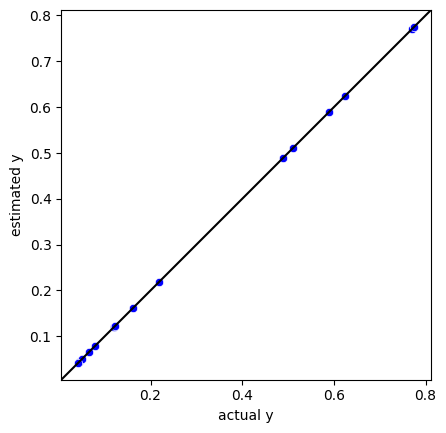

r^2 for training data : 1.0
RMSE for training data : 2.586014451537464e-16
MAE for training data : 2.1371793224034264e-16


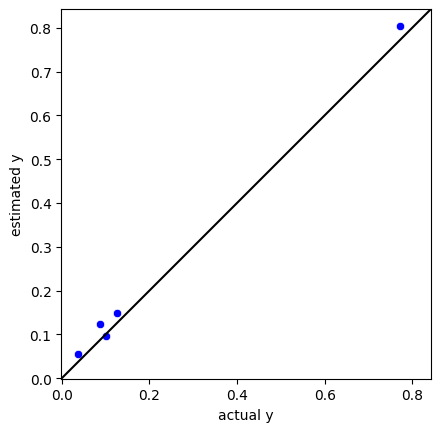

r^2 for test data : 0.9918019254956555
RMSE for test data : 0.024971393011743205
MAE for test data : 0.02220651223073804


In [49]:
# 3.7 非線形重回帰分析
from itertools import combinations

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

number_of_test_samples = 5  # テストデータのサンプル数
dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

# データ分割
y = dataset.get_column("property")  # 目的変数
original_x = dataset.drop(y.name)  # 説明変数

# 説明変数の二乗項や交差項を追加
x = original_x.with_columns(  # 二乗項の追加
    [(pl.col(col) ** 2).alias(f"{col}^2") for col in original_x.columns]
).with_columns(  # 交差項の追加
    [
        (pl.col(col1) * pl.col(col2)).alias(f"{col1}*{col2}")
        for col1, col2 in combinations(original_x.columns, 2)
    ]
)

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
else:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

# 標準偏差が 0 の特徴量の削除
zero_stdev_cols = [
    col for col, std in x_train.std().row(0, named=True).items() if std in [0, None]
]
x_train = x_train.drop(zero_stdev_cols)
x_test = x_test.drop(zero_stdev_cols)

# オートスケーリング
autoscaled_y_train = (y_train - y_train.mean()) / y_train.std()
autoscaled_x_train = x_train.select((pl.all() - pl.all().mean()) / pl.all().std())

# モデル構築
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# 標準回帰係数を保存
pl.DataFrame(
    {"": x_train.columns, "standard_regression_coefficients": model.coef_}
).write_csv("../output/standard_regression_coefficients_nonlinear_ols.csv")

# トレーニングデータの推定
autoscaled_estimated_y_train = model.predict(autoscaled_x_train)  # y の推定
estimated_y_train = (
    autoscaled_estimated_y_train * y_train.std() + y_train.mean()
)  # スケールをもとに戻す
estimated_y_train = pl.Series("estimated_y", estimated_y_train)

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_train, y=estimated_y_train, color="blue")
# 実測値と推定値両方の最大値を取得
y_max = pl.concat([y_train, estimated_y_train]).max()
# 実測値と推定値両方の最小値を取得
y_min = pl.concat([y_train, estimated_y_train]).min()
# 取得した最小値-5%から最大値+5%まで、対角線を作成
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print(
    "RMSE for training data :",
    root_mean_squared_error(y_train, estimated_y_train),
)
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
pl.DataFrame(
    {
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": y_train - estimated_y_train,
    }
).write_csv("../output/estimated_y_train_in_detail_nonlinear_ols.csv")

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = (
    x_test - x_train.mean().select(pl.all().repeat_by(x_test.height).explode())
) / x_train.std().select(pl.all().repeat_by(x_test.height).explode())

# テストデータの推定
autoscaled_estimated_y_test = model.predict(autoscaled_x_test)  # y の推定
estimated_y_test = (
    autoscaled_estimated_y_test * y_train.std() + y_train.mean()
)  # スケールをもとに戻す
estimated_y_test = pl.Series("estimated_y", estimated_y_test)

# テストデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_test, y=estimated_y_test, color="blue")
y_max = pl.concat([y_test, estimated_y_test]).max()  # 実測値と推定値両方の最大値を取得
y_min = pl.concat([y_test, estimated_y_test]).min()  # 実測値と推定値両方の最小値を取得
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print("RMSE for test data :", root_mean_squared_error(y_test, estimated_y_test))
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
results_test = (
    y_test.to_frame()
    .select(pl.col(y_test.name).alias("actual_y"))
    .insert_column(1, estimated_y_test)
    .with_columns(
        (pl.col("actual_y") - pl.col("estimated_y")).alias(
            "error_of_y(actual_y-estimated_y)"
        )
    )
)

results_test.write_csv("../output/estimated_y_test_in_detail_nonlinear_ols.csv")

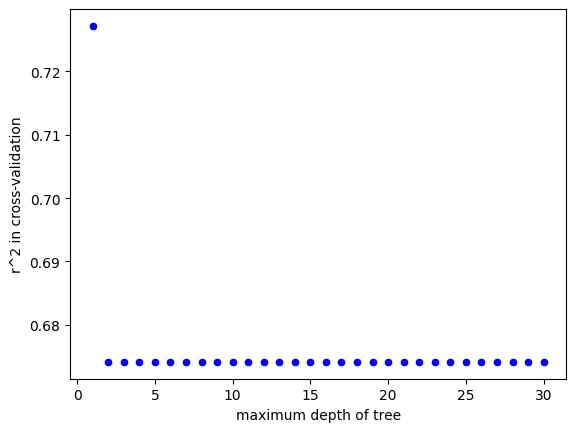

最適化された木の深さの最大値 : 1


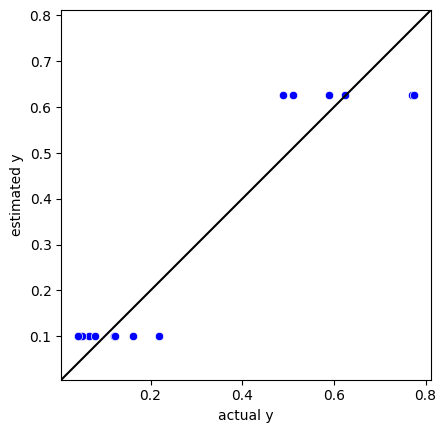

r^2 for training data : 0.9041755964364975
RMSE for training data : 0.08394177876494054
MAE for training data : 0.06844444444444445


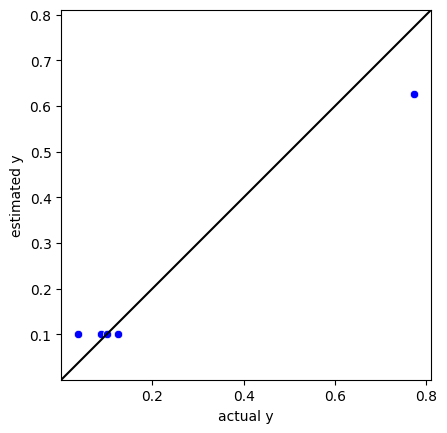

r^2 for test data : 0.9310811429864256
RMSE for test data : 0.07240288514816093
MAE for test data : 0.04960000000000002


In [50]:
# 3.8 決定木回帰分析
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz


def calc_r2_cvs(depth: int, x: pl.DataFrame, y: pl.Series, cv: KFold) -> float:
    model = DecisionTreeRegressor(
        max_depth=depth, min_samples_leaf=min_samples_leaf, random_state=59
    )
    y_pred = cross_val_predict(model, x, y, cv=cv)
    return r2_score(y, y_pred)


number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 10  # クロスバリデーションの fold 数
max_depths = pl.arange(1, 31, eager=True).alias("max_depth")  # 木の深さの最大値の候補
min_samples_leaf = 3  # 葉ノードごとのサンプル数の最小値

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
else:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

# 標準偏差が 0 の特徴量の削除
deleting_variables = [
    col for col, std in x_train.std().row(0, named=True).items() if std in [0, None]
]
x_train = x_train.drop(deleting_variables)
x_test = x_test.drop(deleting_variables)

# クロスバリデーションによる木の深さの最適化
cross_validation = KFold(n_splits=fold_number, random_state=9, shuffle=True)
dt_result = max_depths.to_frame().with_columns(
    pl.col("max_depth")
    .map_elements(
        lambda max_depth: calc_r2_cvs(max_depth, x_train, y_train, cross_validation),
        pl.Float64(),
    )
    .alias("r2_cvs")
)

# 結果の確認
ax = sns.scatterplot(dt_result, x="max_depth", y="r2_cvs", color="blue")
ax.set_xlabel("maximum depth of tree")
ax.set_ylabel("r^2 in cross-validation")
plt.show()

# クロスバリデーション後の最適化された木の深さ
optimal_max_depth = dt_result.item(dt_result["r2_cvs"].arg_max(), "max_depth")
print("最適化された木の深さの最大値 :", optimal_max_depth)

# モデル構築
model = DecisionTreeRegressor(
    max_depth=optimal_max_depth, min_samples_leaf=min_samples_leaf, random_state=59
)
model.fit(x_train, y_train)

# トレーニングデータの推定
estimated_y_train = pl.Series("estimated_y", model.predict(x_train))

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_train, y=estimated_y_train, color="blue")
y_max = pl.concat(
    [y_train, estimated_y_train]
).max()  # 実測値と推定値両方の最大値を取得
y_min = pl.concat(
    [y_train, estimated_y_train]
).min()  # 実測値と推定値両方の最小値を取得
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")
ax.set_ylabel("estimated y")
ax.set_aspect("equal", adjustable="box")
plt.show()

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print(
    "RMSE for training data :",
    root_mean_squared_error(y_train, estimated_y_train),
)
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
results_train = (
    y_train.to_frame()
    .select(pl.col(y_train.name).alias("actual_y"))
    .insert_column(1, estimated_y_train)
    .with_columns(
        (pl.col("actual_y") - pl.col("estimated_y")).alias(
            "error_of_y(actual_y-estimated_y)"
        )
    )
)
results_train.write_csv("../output/estimated_y_train_in_detail_dt.csv")

# テストデータの推定
estimated_y_test = pl.Series("estimated_y", model.predict(x_test))

# テストデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_test, y=estimated_y_test, color="blue")
y_max = pl.concat([y_test, estimated_y_test]).max()  # 実測値と推定値両方の最大値を取得
y_min = pl.concat([y_test, estimated_y_test]).min()  # 実測値と推定値両方の最小値を取得
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")
ax.set_ylabel("estimated y")
ax.set_aspect("equal", adjustable="box")
plt.show()

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print(
    "RMSE for test data :",
    root_mean_squared_error(y_test, estimated_y_test),
)
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
pl.DataFrame(
    {
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": y_test - estimated_y_test,
    }
).write_csv("../output/estimated_y_test_in_detail_dt.csv")

# 決定木のモデルを確認するための dot ファイルの作成
with open("../output/tree.dot", "w") as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=[y.name])


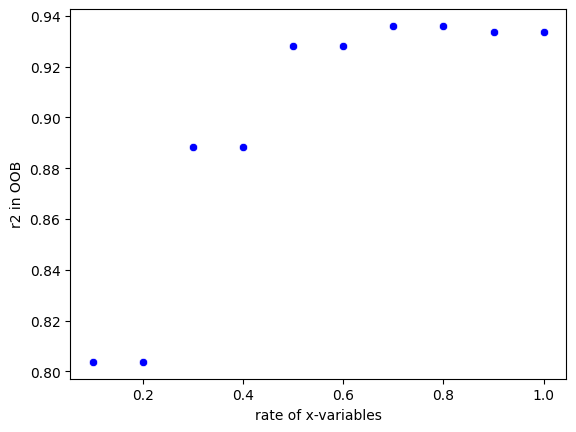

最適化された決定木ごとの X の数 : 4


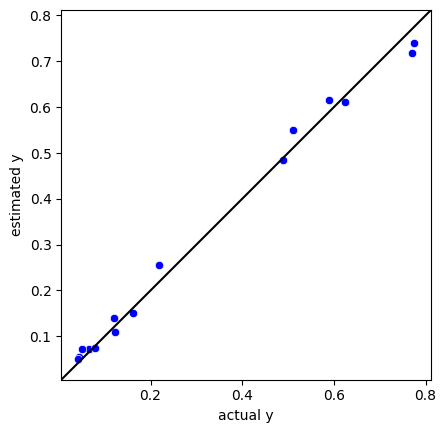

r^2 for training data : 0.991580510178215
RMSE for training data : 0.024881868677591155
MAE for training data : 0.02049177777777782


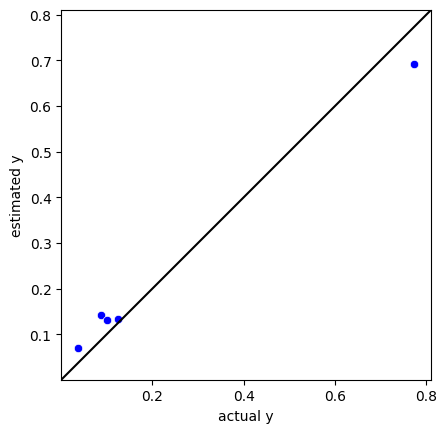

r^2 for test data : 0.9686961080352988
RMSE for test data : 0.04879620053515173
MAE for test data : 0.04205333333333384


In [51]:
# 3.9 ランダムフォレスト

import math

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

number_of_test_samples = 5  # テストデータのサンプル数
# 決定木における X の数の割合
x_variables_rates = pl.linear_space(0.1, 1.0, 10, closed="both", eager=True).alias(
    "x_variables_rate"
)
number_of_trees = 300  # サブデータセットの数

dataset_wt_idx = pl.read_csv("../test_data/resin.csv")
index = dataset_wt_idx.get_column("")
dataset = dataset_wt_idx.drop(index.name)

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
else:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

# 標準偏差が 0 の特徴量の削除
deleting_variables = [
    col for col, std in x_train.std().row(0, named=True).items() if std in [0, None]
]
x_train = x_train.drop(deleting_variables)
x_test = x_test.drop(deleting_variables)


# OOB を用いた X の数の割合の最適化
def calc_r2_oob(x_variables_rate: float, x: pl.DataFrame, y: pl.Series) -> float:
    model = RandomForestRegressor(
        n_estimators=number_of_trees,
        max_features=int(math.ceil(x.width * x_variables_rate)),
        oob_score=True,
        random_state=59,
    )
    model.fit(x, y)
    return model.oob_score_


rf_result = x_variables_rates.to_frame().with_columns(
    pl.col("x_variables_rate")
    .map_elements(lambda rate: calc_r2_oob(rate, x_train, y_train), pl.Float64)
    .alias("r2_oob")
)

# 結果の確認
ax = sns.scatterplot(data=rf_result, x="x_variables_rate", y="r2_oob", color="blue")
ax.set_xlabel("rate of x-variables")
ax.set_ylabel("r2 in OOB")
plt.show()
# OOB 後の最適化された決定木ごとの X の数の割合
optimal_x_variables_rate = rf_result.item(
    rf_result["r2_oob"].arg_max(), "x_variables_rate"
)
print(
    "最適化された決定木ごとの X の数 :",
    int(math.ceil(x_train.width * optimal_x_variables_rate)),
)

# モデル構築
model = RandomForestRegressor(
    n_estimators=number_of_trees,
    max_features=int(math.ceil(x_train.width * optimal_x_variables_rate)),
    oob_score=True,
    random_state=59,
)
model.fit(x_train, y_train)

# 特徴量の重要度
pl.DataFrame(
    {
        "": x_train.columns,
        "importance": model.feature_importances_,
    }
).write_csv("../output/variable_importance_rf.csv")

# トレーニングデータの推定
estimated_y_train = pl.Series("estimated_y", model.predict(x_train))

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_train, y=estimated_y_train, color="blue")
y_max = pl.concat(
    [y_train, estimated_y_train]
).max()  # 実測値と推定値両方の最大値を取得
y_min = pl.concat(
    [y_train, estimated_y_train]
).min()  # 実測値と推定値両方の最小値を取得
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")
ax.set_ylabel("estimated y")
ax.set_aspect("equal", adjustable="box")
plt.show()

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print("RMSE for training data :", root_mean_squared_error(y_train, estimated_y_train))
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
pl.DataFrame(
    {
        "actual_y": y_train,
        "estimated_y": estimated_y_train,
        "error_of_y(actual_y-estimated_y)": y_train - estimated_y_train,
    }
).write_csv("../output/estimated_y_train_in_detail_rf.csv")

# テストデータの推定
estimated_y_test = pl.Series("estimated_y", model.predict(x_test))

# テストデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_test, y=estimated_y_test, color="blue")
y_max = pl.concat([y_test, estimated_y_test]).max()  # 実測値と推定値両方の最大値を取得
y_min = pl.concat([y_test, estimated_y_test]).min()  # 実測値と推定値両方の最小値を取得
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")
ax.set_ylabel("estimated y")
ax.set_aspect("equal", adjustable="box")
plt.show()

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print("RMSE for test data :", root_mean_squared_error(y_test, estimated_y_test))
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
pl.DataFrame(
    {
        "actual_y": y_test,
        "estimated_y": estimated_y_test,
        "error_of_y(actual_y-estimated_y)": y_test - estimated_y_test,
    }
).write_csv("../output/estimated_y_test_in_detail_rf.csv")

最適化された C : 0.0625 (log(C)=-4.0)
最適化された ε : 0.125 (log(ε)=-3.0)


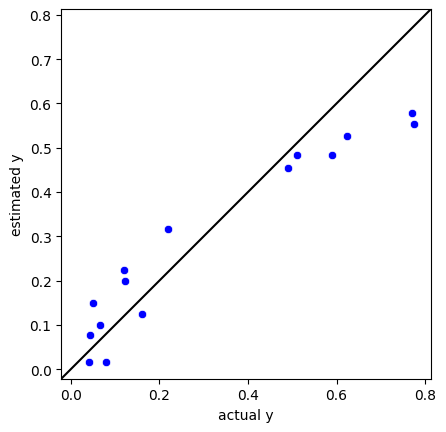

r^2 for training data : 0.8611071828588115
RMSE for training data : 0.10106016404118716
MAE for training data : 0.08339400520184115


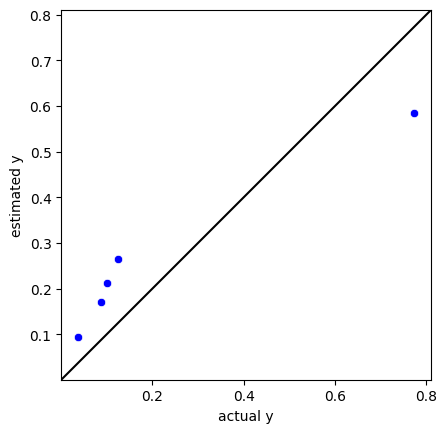

r^2 for test data : 0.7968905795557958
RMSE for test data : 0.12429448890286456
MAE for test data : 0.11557539620640607


In [3]:
# 3.10 サポートベクター回帰(リニア)
import math
import warnings

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVR

warnings.filterwarnings("ignore")

number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 5  # クロスバリデーションの fold 数
linear_svr_cs = 2.0 ** pl.arange(-10, 5, eager=True)
linear_svr_epsilons = 2.0 ** pl.arange(-10, 0, eager=True)

dataset = pl.read_csv("../test_data/resin.csv")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
else:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

# 標準偏差が 0 の特徴量の削除
deleting_variables = [
    col for col, std in x_train.std().row(0, named=True).items() if std in [0, None]
]
x_train = x_train.drop(deleting_variables)
x_test = x_test.drop(deleting_variables)

# オートスケーリング
autoscaled_y_train = (y_train - y_train.mean()) / y_train.std()
autoscaled_x_train = x_train.select((pl.all() - pl.all().mean()) / pl.all().std())

# クロスバリデーションによる C, ε の最適化
cross_validation = KFold(n_splits=fold_number, random_state=9, shuffle=True)
gs_cv = GridSearchCV(
    SVR(kernel="linear"),
    {"C": linear_svr_cs.to_numpy(), "epsilon": linear_svr_epsilons.to_numpy()},
    cv=cross_validation,
)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_linear_svr_c = gs_cv.best_params_["C"]
optimal_linear_svr_epsilon = gs_cv.best_params_["epsilon"]

print(
    f"最適化された C : {optimal_linear_svr_c} (log(C)={math.log2(optimal_linear_svr_c)})"
)
print(
    f"最適化された ε : {optimal_linear_svr_epsilon} (log(ε)={math.log2(optimal_linear_svr_epsilon)})"
)

# モデル構築
model = SVR(kernel="linear", C=optimal_linear_svr_c, epsilon=optimal_linear_svr_epsilon)
model.fit(autoscaled_x_train, autoscaled_y_train)

# 標準回帰係数
standard_regression_coefficients = pl.DataFrame(
    {
        "": x_train.columns,
        "standard_regression_coefficients": model.coef_.flatten(),
    }
).write_csv("../output/standard_regression_coefficients_svr_linear.csv")

# トレーニングデータの推定
autoscaled_estimated_y_train = pl.Series(
    "estimated_y", model.predict(autoscaled_x_train)
)
estimated_y_train = autoscaled_estimated_y_train * y_train.std() + y_train.mean()

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_train, y=estimated_y_train, color="blue")
y_max = pl.concat([y_train, estimated_y_train]).max()
y_min = pl.concat([y_train, estimated_y_train]).min()
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")
ax.set_ylabel("estimated y")
ax.set_aspect("equal", adjustable="box")
plt.show()

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print(
    "RMSE for training data :",
    root_mean_squared_error(y_train, estimated_y_train),
)
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    [
        y_train.alias("actual_y"),
        estimated_y_train.alias("estimated_y"),
        (y_train - estimated_y_train).alias("error_of_y(actual_y-estimated_y)"),
    ]
).write_csv("../output/estimated_y_train_in_detail_svr_linear.csv")

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = (
    x_test - x_train.mean().select(pl.all().repeat_by(x_test.height).explode())
) / x_train.std().select(pl.all().repeat_by(x_test.height).explode())

# テストデータの推定
autoscaled_estimated_y_test = pl.Series("estimated_y", model.predict(autoscaled_x_test))
estimated_y_test = autoscaled_estimated_y_test * y_train.std() + y_train.mean()

# テストデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_test, y=estimated_y_test, color="blue")
y_max = pl.concat([y_test, estimated_y_test]).max()
y_min = pl.concat([y_test, estimated_y_test]).min()
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)
ax.set_xlabel("actual y")
ax.set_ylabel("estimated y")
ax.set_aspect("equal", adjustable="box")
plt.show()

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print(
    "RMSE for test data :",
    root_mean_squared_error(y_test, estimated_y_test),
)
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
results_test = pl.DataFrame(
    [
        y_test.alias("actual_y"),
        estimated_y_test.alias("estimated_y"),
        (y_test - estimated_y_test).alias("error_of_y(actual_y-estimated_y)"),
    ]
).write_csv("../output/estimated_y_test_in_detail_svr_linear.csv")

最適化された C : 2.0 (log(C)=1.0)
最適化された ε : 0.0009765625 (log(ε)=-10.0)
最適化された γ : 0.125 (log(γ)=-3.0)


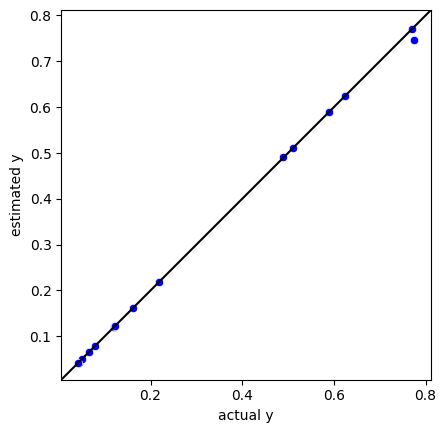

r^2 for training data : 0.9992786834253825
RMSE for training data : 0.007282878443245324
MAE for training data : 0.0021640505597515145


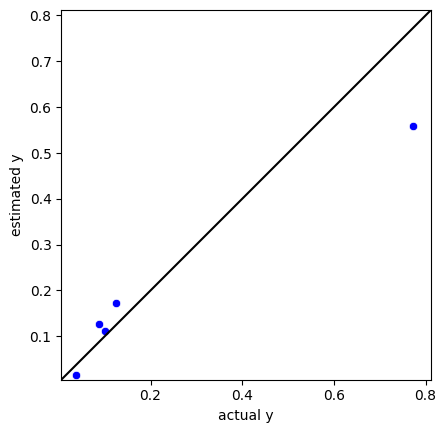

r^2 for test data : 0.8680484824452414
RMSE for test data : 0.10018300034351289
MAE for test data : 0.06714949414490598


In [52]:
# 3.10 サポートベクター回帰(ガウシアンカーネル)
import math
import warnings

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.svm import SVR  # SVR モデルの構築に使用

warnings.filterwarnings("ignore")

number_of_test_samples = 5  # テストデータのサンプル数
fold_number = 10  # クロスバリデーションの fold 数

exp_base = pl.Series()

# SVR の C の候補
nonlinear_svr_cs = 2.0 ** pl.arange(-5, 11, eager=True).alias("c")
# SVR の ε の候補
nonlinear_svr_epsilons = 2.0 ** pl.arange(-10, 1, eager=True).alias("epsilon")
# SVR のガウシアンカーネルの γ の候補
nonlinear_svr_gammas = 2.0 ** pl.arange(-20, 11, eager=True).alias("gamma")

dataset = pl.read_csv("../test_data/resin.csv")

# データ分割
y = dataset.get_column("property")  # 目的変数
x = dataset.drop(y.name)  # 説明変数

# ランダムにトレーニングデータとテストデータとに分割
if number_of_test_samples == 0:
    x_train = x.clone()
    x_test = x.clone()
    y_train = y.clone()
    y_test = y.clone()
else:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=number_of_test_samples, shuffle=True, random_state=99
    )
    x_train = pl.DataFrame(x_train, schema=x.columns)
    x_test = pl.DataFrame(x_test, schema=x.columns)
    y_train = pl.Series(y.name, y_train)
    y_test = pl.Series(y.name, y_test)

# 標準偏差が 0 の特徴量の削除
deleting_variables = [
    col for col, std in x_train.std().row(0, named=True).items() if std in [0, None]
]
x_train = x_train.drop(deleting_variables)
x_test = x_test.drop(deleting_variables)

# オートスケーリング
autoscaled_y_train = (y_train - y_train.mean()) / y_train.std()
autoscaled_x_train = x_train.select((pl.all() - pl.all().mean()) / pl.all().std())

# ハイパーパラメータC, ε, γの最適化
# グラム行列の分散が最大となるγを探索
autoscaled_x_train_per_sample = autoscaled_x_train.select(
    pl.concat_list(pl.all()).alias("sample")
)
sample_distances = (
    # すべてのサンプルを組み合わせる
    autoscaled_x_train_per_sample.join(
        autoscaled_x_train_per_sample, how="cross", suffix="_right"
    )
    .select(
        # 全サンプル間の全データのユークリッド距離の二乗を計算
        (pl.col("sample") - pl.col("sample_right"))
        .list.eval(pl.element().pow(2))
        .list.sum()
        .implode()  # グラム行列の計算を簡単にするために、全距離をリスト化
        .alias("distance"),
    )
    .to_series(0)
)

gram_matrix = (-nonlinear_svr_gammas * sample_distances).list.eval(pl.element().exp())
optimal_nonlinear_gamma: float = nonlinear_svr_gammas.item(
    gram_matrix.list.var().arg_max()
)


# CV による ε の最適化
# クロスバリデーションの分割の設定
cross_validation = KFold(n_splits=fold_number, random_state=9, shuffle=True)


# ε の最適化
def calc_r2(C: float, epsilon: float, gamma: float, x, y, y_true: pl.Series) -> float:
    model = SVR(kernel="rbf", C=C, epsilon=epsilon, gamma=gamma)
    autoscaled_estimated_y_in_cv = cross_val_predict(model, x, y, cv=cross_validation)
    return r2_score(y_true, autoscaled_estimated_y_in_cv * y_true.std() + y_true.mean())


r2_cvs = nonlinear_svr_epsilons.map_elements(
    lambda epsilon: calc_r2(
        3,
        epsilon,
        optimal_nonlinear_gamma,
        autoscaled_x_train,
        autoscaled_y_train,
        y_train,
    )
)
optimal_nonlinear_epsilon: float = nonlinear_svr_epsilons.item(r2_cvs.arg_max())

# CV による C の最適化
r2_cvs = nonlinear_svr_cs.map_elements(
    lambda c: calc_r2(
        c,
        optimal_nonlinear_epsilon,
        optimal_nonlinear_gamma,
        autoscaled_x_train,
        autoscaled_y_train,
        y_train,
    )
)
optimal_nonlinear_c: float = nonlinear_svr_cs.item(r2_cvs.arg_max())

# CV による γ の最適化
r2_cvs = nonlinear_svr_gammas.map_elements(
    lambda gamma: calc_r2(
        optimal_nonlinear_c,
        optimal_nonlinear_epsilon,
        gamma,
        autoscaled_x_train,
        autoscaled_y_train,
        y_train,
    )
)
optimal_nonlinear_gamma: float = nonlinear_svr_gammas.item(r2_cvs.arg_max())

# 結果の確認
print(
    f"最適化された C : {optimal_nonlinear_c} (log(C)={math.log2(optimal_nonlinear_c)})"
)
print(
    f"最適化された ε : {optimal_nonlinear_epsilon} (log(ε)={math.log2(optimal_nonlinear_epsilon)})"
)
print(
    f"最適化された γ : {optimal_nonlinear_gamma} (log(γ)={math.log2(optimal_nonlinear_gamma)})"
)

# モデル構築
model = SVR(  # SVR モデルの宣言
    kernel="rbf",
    C=optimal_nonlinear_c,
    epsilon=optimal_nonlinear_epsilon,
    gamma=optimal_nonlinear_gamma,
)
model.fit(autoscaled_x_train, autoscaled_y_train)  # モデル構築

# トレーニングデータの推定
autoscaled_estimated_y_train = pl.Series(
    "estimated_y", model.predict(autoscaled_x_train)
)  # y の推定
# スケールをもとに戻す
estimated_y_train = autoscaled_estimated_y_train * y_train.std() + y_train.mean()
x_train.columns

# トレーニングデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_train, y=estimated_y_train, color="blue")

# 実測値と推定値両方の最大値を取得
y_max = pl.concat([y_train, estimated_y_train]).max()
# 実測値と推定値両方の最小値を取得
y_min = pl.concat([y_train, estimated_y_train]).min()
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(  # 取得した最小値-5%から最大値+5%まで、対角線を作成
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# トレーニングデータのr2, RMSE, MAE
print("r^2 for training data :", r2_score(y_train, estimated_y_train))
print("RMSE for training data :", root_mean_squared_error(y_train, estimated_y_train))
print("MAE for training data :", mean_absolute_error(y_train, estimated_y_train))

# トレーニングデータの結果の保存
results_train = pl.DataFrame(
    [
        y_train.alias("actual_y"),
        estimated_y_train,
        (y_train - estimated_y_train).alias("error_of_y(actual_y-estimated_y)"),
    ],
).write_csv("../output/estimated_y_train_in_detail_svr_gaussian.csv")

# テストデータの、トレーニングデータを用いたオートスケーリング
autoscaled_x_test = (
    x_test - x_train.mean().select(pl.all().repeat_by(x_test.height).explode())
) / x_train.std().select(pl.all().repeat_by(x_test.height).explode())

# テストデータの推定
autoscaled_estimated_y_test = pl.Series("estimated_y", model.predict(autoscaled_x_test))
# スケールをもとに戻す
estimated_y_test = autoscaled_estimated_y_test * y_train.std() + y_train.mean()

# テストデータの実測値 vs. 推定値のプロット
ax = sns.scatterplot(x=y_test, y=estimated_y_test, color="blue")
# 実測値と推定値両方の最大値を取得
y_max = pl.concat([y_train, estimated_y_train]).max()
# 実測値と推定値両方の最小値を取得
y_min = pl.concat([y_train, estimated_y_train]).min()
y_scope_margin = 0.05 * (y_max - y_min)
ax.plot(
    [y_min - y_scope_margin, y_max + y_scope_margin],
    [y_min - y_scope_margin, y_max + y_scope_margin],
    "k-",
)  # 取得した最小値-5%から最大値+5%まで、対角線を作成
ax.set_ylim(y_min - y_scope_margin, y_max + y_scope_margin)  # y 軸の範囲の設定
ax.set_xlim(y_min - y_scope_margin, y_max + y_scope_margin)  # x 軸の範囲の設定
ax.set_xlabel("actual y")  # x 軸の名前
ax.set_ylabel("estimated y")  # y 軸の名前
ax.set_aspect("equal", adjustable="box")  # 図の形を正方形に
plt.show()  # 以上の設定で描画

# テストデータのr2, RMSE, MAE
print("r^2 for test data :", r2_score(y_test, estimated_y_test))
print("RMSE for test data :", root_mean_squared_error(y_test, estimated_y_test))
print("MAE for test data :", mean_absolute_error(y_test, estimated_y_test))

# テストデータの結果の保存
results_test = pl.DataFrame(
    [
        y_test.alias("actual_y"),
        estimated_y_test,
        (y_test - estimated_y_test).alias("error_of_y(actual_y-estimated_y)"),
    ],
).write_csv("../output/estimated_y_test_in_detail_svr_gaussian.csv")
